In [1]:
import torch
from dataset_class import dataset,params2theta,theta2params
import dataset_class as dc
import pandas as pd
from matplotlib import pyplot as plt

import numpy as np
np.random.seed(42)

In [2]:
def load_dataset(filename,Nmax=10**1000,remove_zeros=True):
    df=pd.read_csv(filename)[:Nmax]
    cts,dils = df['Counts'].to_numpy(),df['Dilution'].to_numpy().astype(float)
    if remove_zeros:
        cts,dils = cts[cts!=0],dils[cts!=0]
    return dataset(cts,dils)

In [3]:
probs = lambda data,theta: torch.exp(dc.Igaussmix_loglike(data.n[1:],*theta2params(theta,theta.size(0)//3)))
probs_sep = lambda data,m,s,r: torch.exp(dc.Igaussmix_loglike(data.n[1:],m,s,r))

In [4]:
data_SA = load_dataset('vega_data/SA_clean_data.csv',remove_zeros=True)
data_SA.evaluate(lr=.01,dir_factor=.9)

7.762277720312461 -995.2056912763381 -677.9575787332494
7.61688691155701 -986.7694564468685 -655.6681032351395
7.489184571368678 -979.2286722965451 -635.5760313112771
7.3472133353244224 -966.0737552963351 -617.7065725700934
7.201246419889728 -950.9944679200335 -601.5244858783134
7.078696421586449 -940.1095889917656 -586.617093720643
6.98554094097545 -933.5969222792082 -573.5470512882132
6.912550627061109 -929.6777041856518 -562.0011091335411
6.849570291249346 -926.8322078983181 -551.3952243724904
6.7938401279258995 -924.7748798401326 -541.5929680609107
6.746585153058152 -923.8032241479651 -532.5258999948863
6.705383911107383 -923.2926822870346 -524.215062402117
6.667039182787262 -922.6743615419783 -516.6276843118109
6.632680153909638 -922.2102238361233 -509.7348867823819
6.6004390955043135 -921.6401921823775 -503.3861670420686
6.5710836944269175 -921.2696821196471 -497.4947092346163
6.545101820438067 -921.1114293480139 -492.0944574052446
6.520692626475474 -920.8367006968758 -487.115479

(tensor([1.5795e+04, 2.1184e+03, 5.3869e+02, 4.9533e+03, 3.9649e+04, 1.6486e+03,
         3.5934e+01, 1.9385e+02, 1.3258e+03, 4.5571e+03, 4.2696e+03, 4.1415e+02,
         1.6177e+02, 7.0440e+04, 6.5168e+00, 1.0630e+00, 1.0104e+00, 1.0103e+00,
         1.0104e+00, 1.0120e+00, 1.0102e+00, 1.0102e+00, 1.0102e+00],
        device='cuda:0', dtype=torch.float64),
 tensor([3.8592e+03, 5.7720e+02, 1.3190e+02, 1.0156e+03, 8.5158e+03, 4.6950e+02,
         8.5145e+00, 3.4619e+01, 4.0046e+02, 1.2236e+03, 1.2714e+03, 1.1960e+02,
         4.7428e+01, 1.7549e+04, 3.1479e+00, 5.4106e-01, 3.7195e-01, 3.7184e-01,
         3.7435e-01, 4.2395e-01, 3.7180e-01, 3.7170e-01, 3.7166e-01],
        device='cuda:0', dtype=torch.float64),
 tensor([0.1213, 0.1087, 0.0991, 0.0840, 0.0813, 0.0740, 0.0735, 0.0693, 0.0559,
         0.0554, 0.0475, 0.0410, 0.0234, 0.0233, 0.0098, 0.0070, 0.0060, 0.0051,
         0.0042, 0.0035, 0.0028, 0.0022, 0.0017], device='cuda:0',
        dtype=torch.float64))

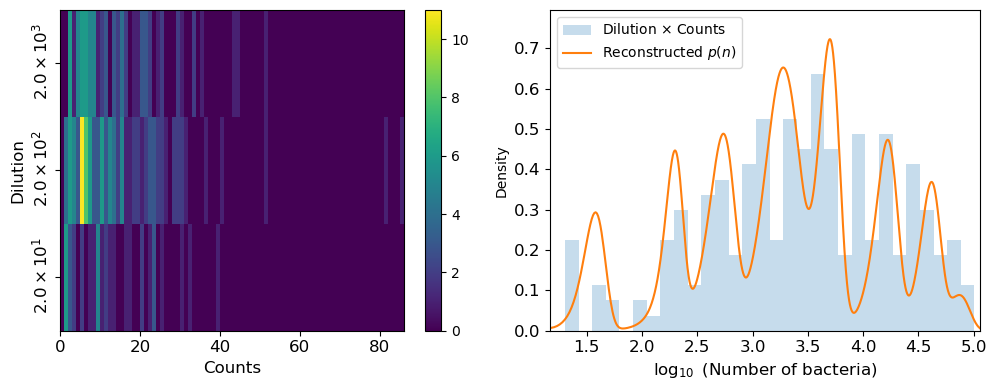

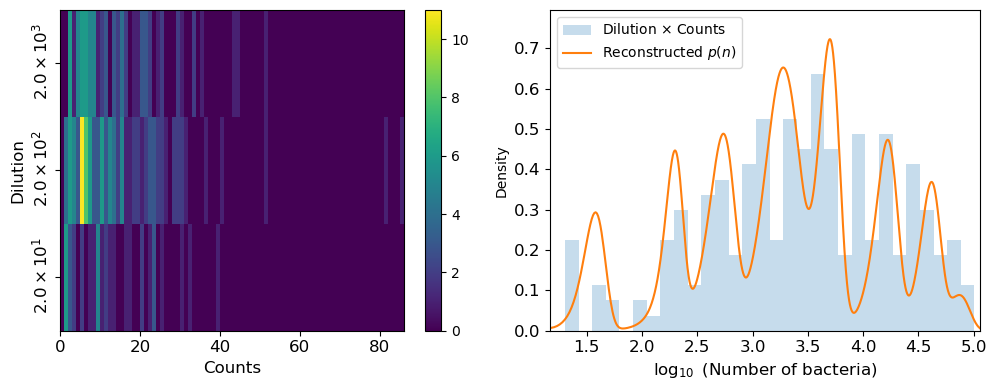

In [5]:
data_SA.make_plot(filename='graphs/real/SA_densities.png')

In [6]:
g = []
params = []

In [ ]:
def get_map(dirfactor,numcomponents):
    data_SA.evaluate(lr=.01,components=numcomponents,dir_factor=dirfactor)
    g.append(data_SA.ev)
    params.append([dirfactor,numcomponents])
    data_SA.make_plot(filename='graphs/real/SA_densities_dir={}_comp={}.png'.format(dirfactor,numcomponents))

7.726064150931089 -990.1271078296768 -675.5302791713896
7.588136329467085 -980.1941589196896 -655.9649553583524
7.4499158541473784 -968.5797836944527 -637.4750600581524
7.306418562515951 -954.337605542417 -620.8671735567475
7.1796973900514125 -942.5461330326741 -605.8757760138458
7.081215717640616 -935.5621896714301 -592.1225122915912
7.001910162004757 -931.0561395916867 -579.8023246044883
6.93398051357578 -927.9126638356931 -568.4265004135309
6.871184957163992 -925.3100981409709 -557.6009065998285
6.817189796120706 -923.7103107076805 -547.7420606532716
6.770985506355739 -922.6788522035686 -538.9248209728497
6.7302660973228985 -921.9299065678492 -530.986832626688
6.694066211730322 -921.4564220086119 -523.7161259933742
6.660517837932481 -921.0714522023998 -516.9114255680154
6.630298627474049 -920.9703689470444 -510.55564363314136
6.602464385643399 -920.8597512289958 -504.69296193486184
6.576563146305418 -920.677229927519 -499.3261804689298
6.5527957966067465 -920.4981083323423 -494.4175

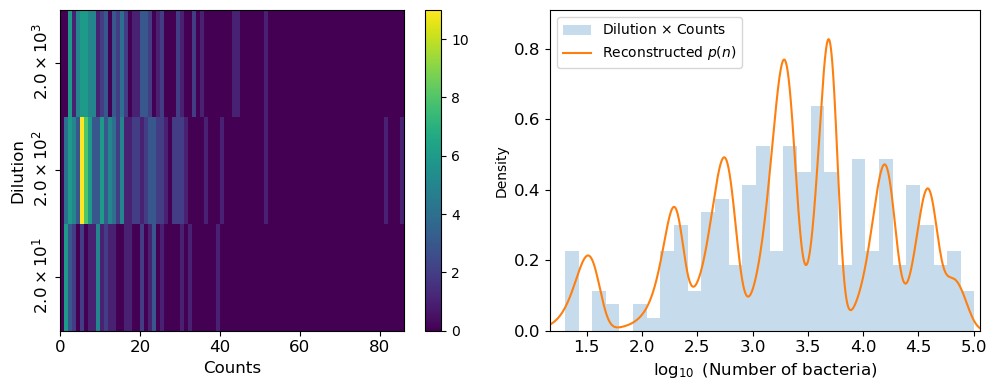

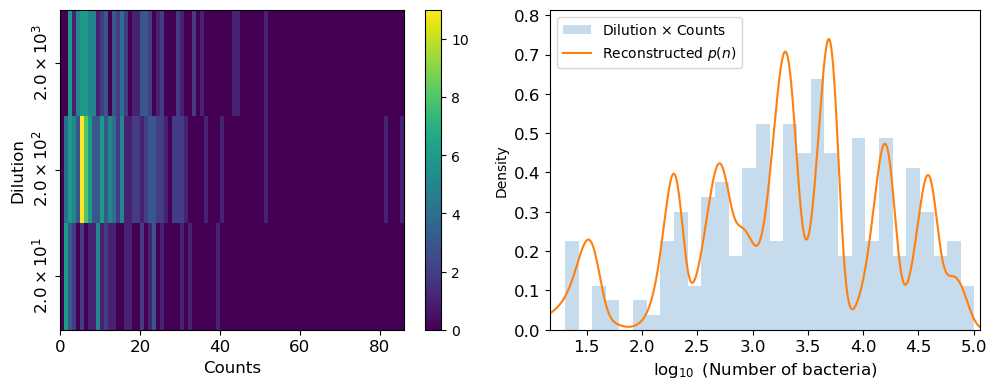

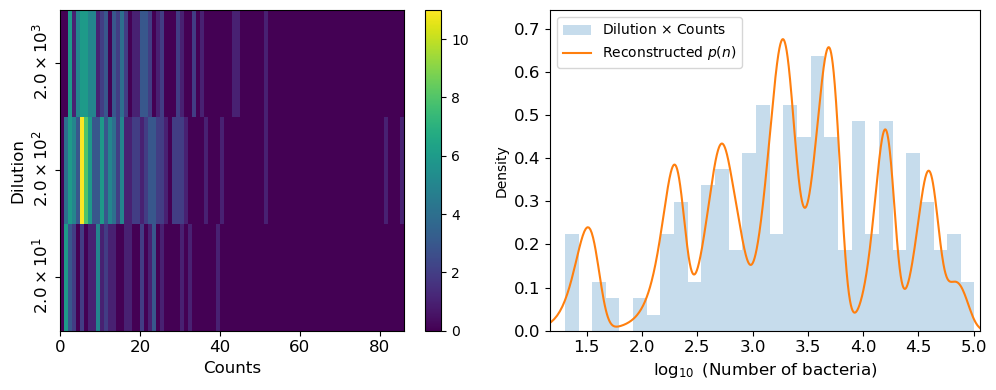

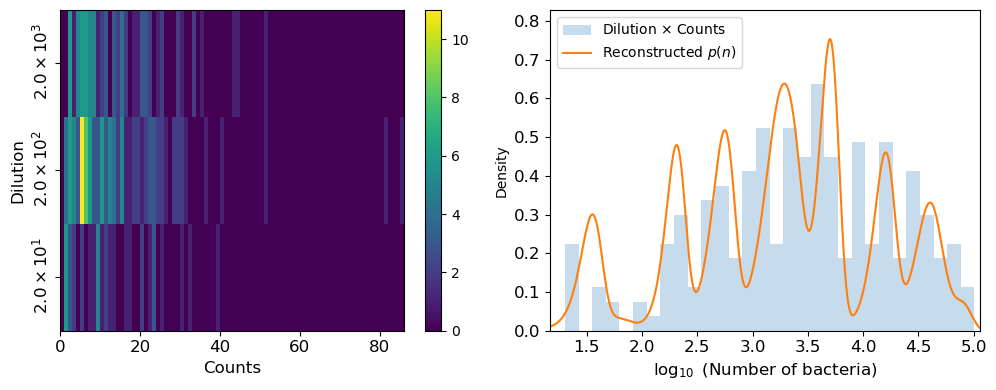

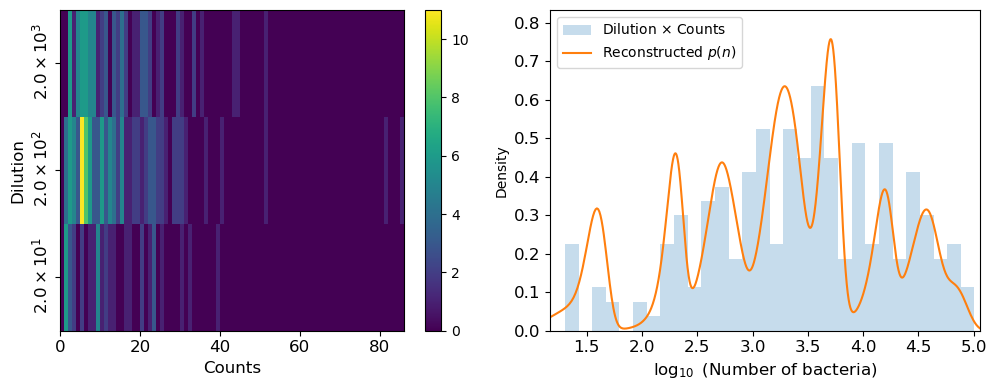

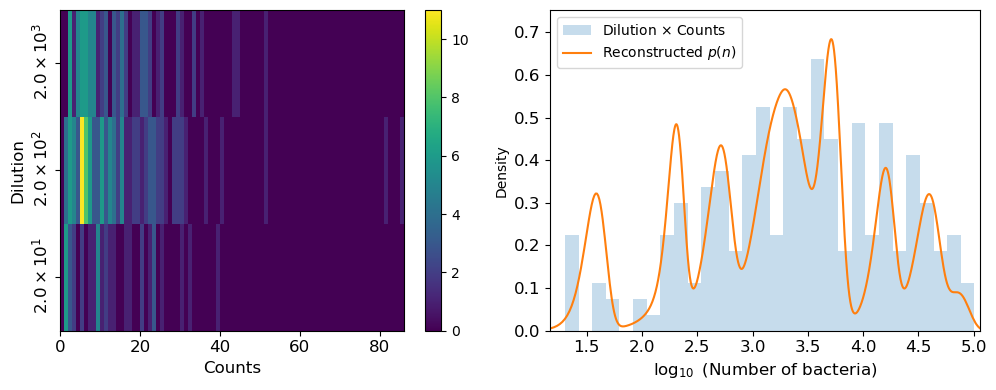

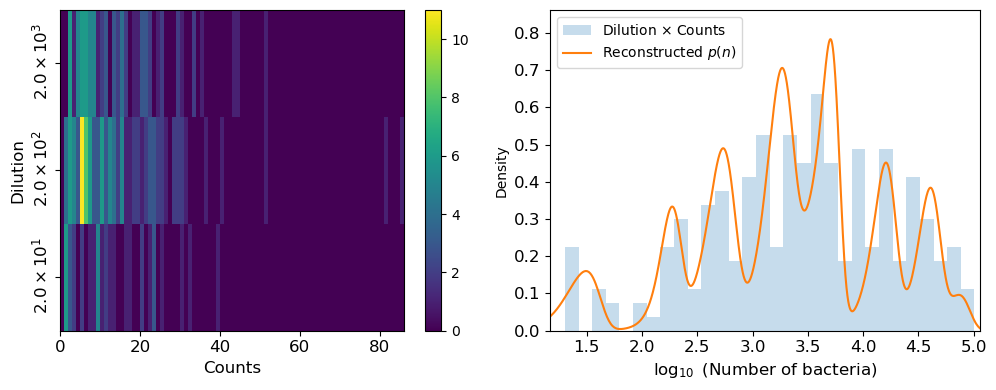

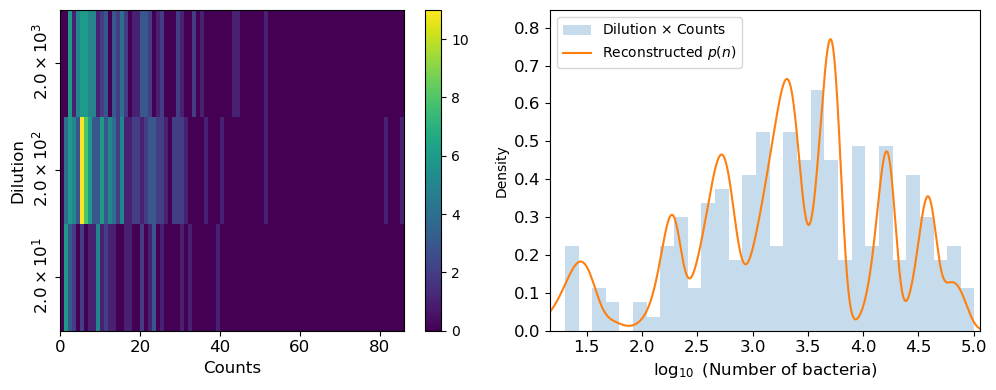

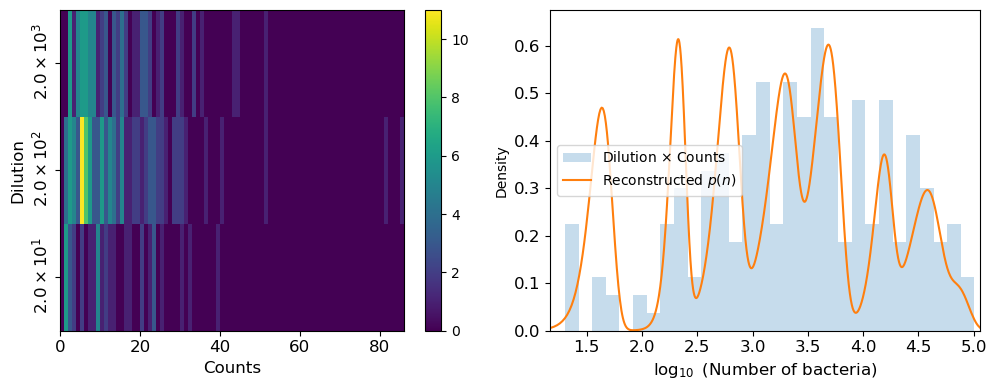

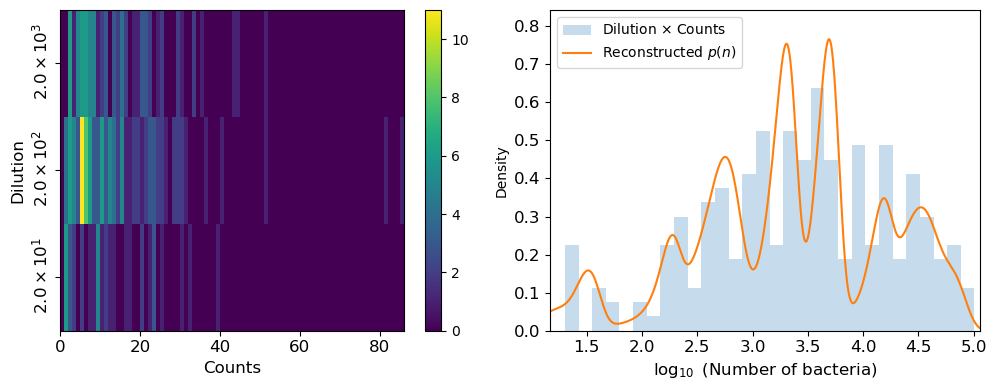

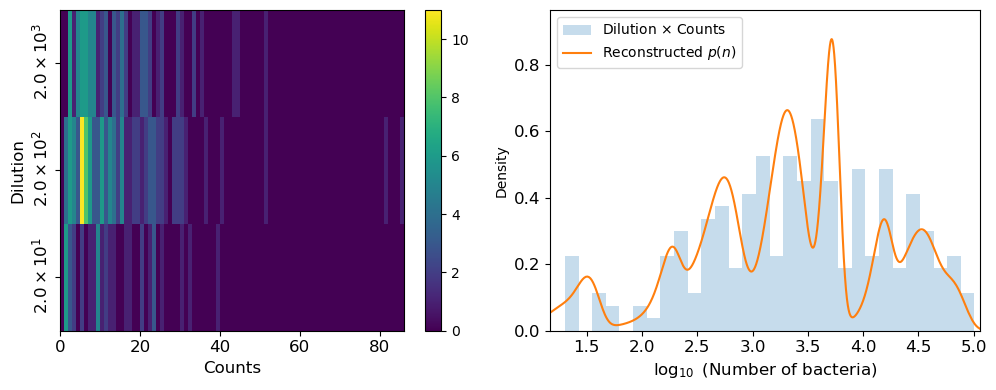

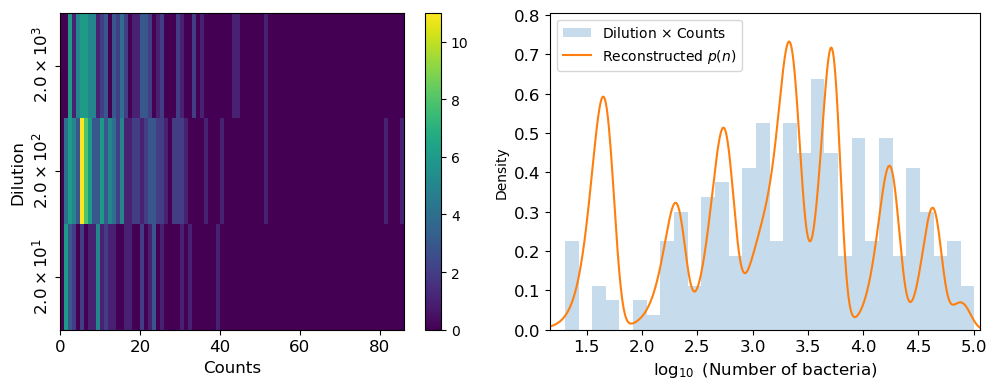

In [7]:
for dir in (.95,.9,.85,.8):
    for components in  (25,30,35):
        data_SA.evaluate(lr=.01,components=components,dir_factor=dir)
        g.append(data_SA.ev)
        params.append([dir,components])
        data_SA.make_plot(filename='graphs/real/SA_densities_dir={}_comp={}.png'.format(dir,components))

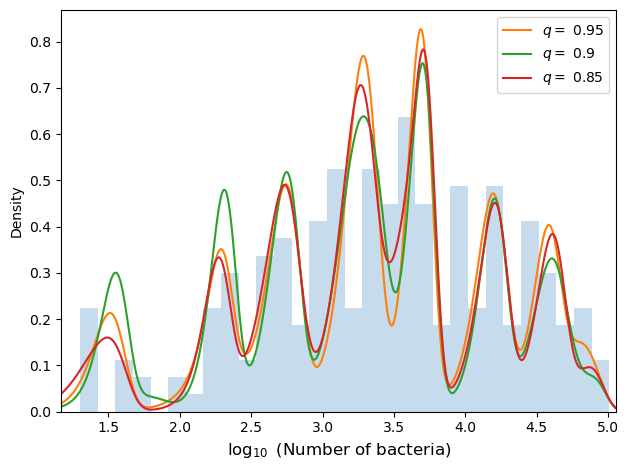

In [21]:
l10 = 2.30258509
x = data_SA.n[1:].cpu()
h = plt.hist(torch.log10(data_SA.counts*data_SA.dils).reshape(-1),alpha=.25,bins=30,density=True)

for ev,(dir,comp) in zip(g,params):
    if comp == 25 and dir >.8:
        m,s,r = ev
        p = torch.exp(dc.Igaussmix_loglike(x,m.cpu(),s.cpu(),r.cpu()))
        plt.plot(torch.log10(x),p*x*l10,label=r'$q =$ {}'.format(dir))

plt.xlim(h[1][0]*.9,h[1][-1]*1.01)
plt.xlabel(r'$\log_{10}$ (Number of bacteria)',fontsize=12)
plt.ylabel('Density')

plt.legend()
plt.tight_layout()
plt.savefig('graphs/synth/SIB/changeq.png',dpi=500)

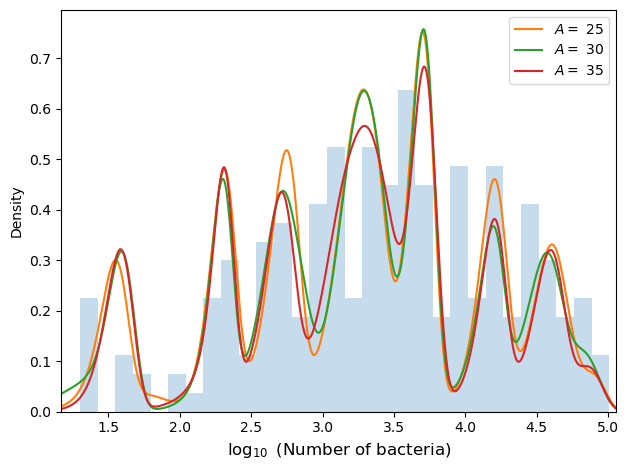

In [22]:
h = plt.hist(torch.log10(data_SA.counts*data_SA.dils).reshape(-1),alpha=.25,bins=30,density=True)

for ev,(dir,comp) in zip(g,params):
    if dir==.9:
        m,s,r = ev
        p = torch.exp(dc.Igaussmix_loglike(x,m.cpu(),s.cpu(),r.cpu()))
        plt.plot(torch.log10(x),p*x*l10,label=r'$A =$ {}'.format(comp))

plt.xlim(h[1][0]*.9,h[1][-1]*1.01)
plt.xlabel(r'$\log_{10}$ (Number of bacteria)',fontsize=12)
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.savefig('graphs/synth/SIB/changeA.png',dpi=500)